In [ ]:
import math
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"/content/post-operative.data")
df.head(10)

,L-CORE,L-SURF,L-OS,L-BP,S-SURF,S-CORE,S-BP,COMFORT,DECISION
0,2,1,4,2,3,3,3,15.0,3
1,2,3,4,3,3,3,3,10.0,2
2,3,1,4,3,3,3,2,10.0,3
3,2,1,3,3,3,3,2,15.0,3
4,2,2,4,3,3,3,3,10.0,3
5,3,1,3,2,3,3,3,15.0,2
6,2,1,4,3,3,3,2,5.0,2
7,3,2,4,2,3,3,3,10.0,2
8,2,3,3,2,3,3,3,10.0,2
9,2,1,4,2,3,3,2,10.0,2


Атрибут DECISION является меткой

In [ ]:
df_labels = df["DECISION"]
df = df.loc[:, df.columns != "DECISION"]
df.fillna(df.median(numeric_only=True).round(1), inplace=True) # заполняем нулевые значения медианными
df.head(10)

<ipython-input-64-d195df134f18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.median(numeric_only=True).round(1), inplace=True) # заполняем нулевые значения медианными


,L-CORE,L-SURF,L-OS,L-BP,S-SURF,S-CORE,S-BP,COMFORT
0,2,1,4,2,3,3,3,15.0
1,2,3,4,3,3,3,3,10.0
2,3,1,4,3,3,3,2,10.0
3,2,1,3,3,3,3,2,15.0
4,2,2,4,3,3,3,3,10.0
5,3,1,3,2,3,3,3,15.0
6,2,1,4,3,3,3,2,5.0
7,3,2,4,2,3,3,3,10.0
8,2,3,3,2,3,3,3,10.0
9,2,1,4,2,3,3,2,10.0


In [ ]:
#импортируем пакет предварительной обработки данных
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(df.to_numpy())
scaled_data = scaler.transform(df.to_numpy())
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7
count,87.000000,87.000000,87.000000,87.000000,87.0,87.000000,87.000000,87.000000
mean,0.465517,0.454023,0.471264,0.643678,0.0,0.988506,0.758621,0.594253
std,0.293269,0.337847,0.502067,0.263121,0.0,0.107211,0.430400,0.230448
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.500000,0.0,1.000000,1.000000,0.500000
50%,0.500000,0.500000,0.000000,0.500000,0.0,1.000000,1.000000,0.500000
75%,0.500000,0.500000,1.000000,1.000000,0.0,1.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


# Иерархические алгоритмы кластеризации

#### Иерархическая кластеризация с использованием метода Уорда для вычисления расстояний между кластерами.

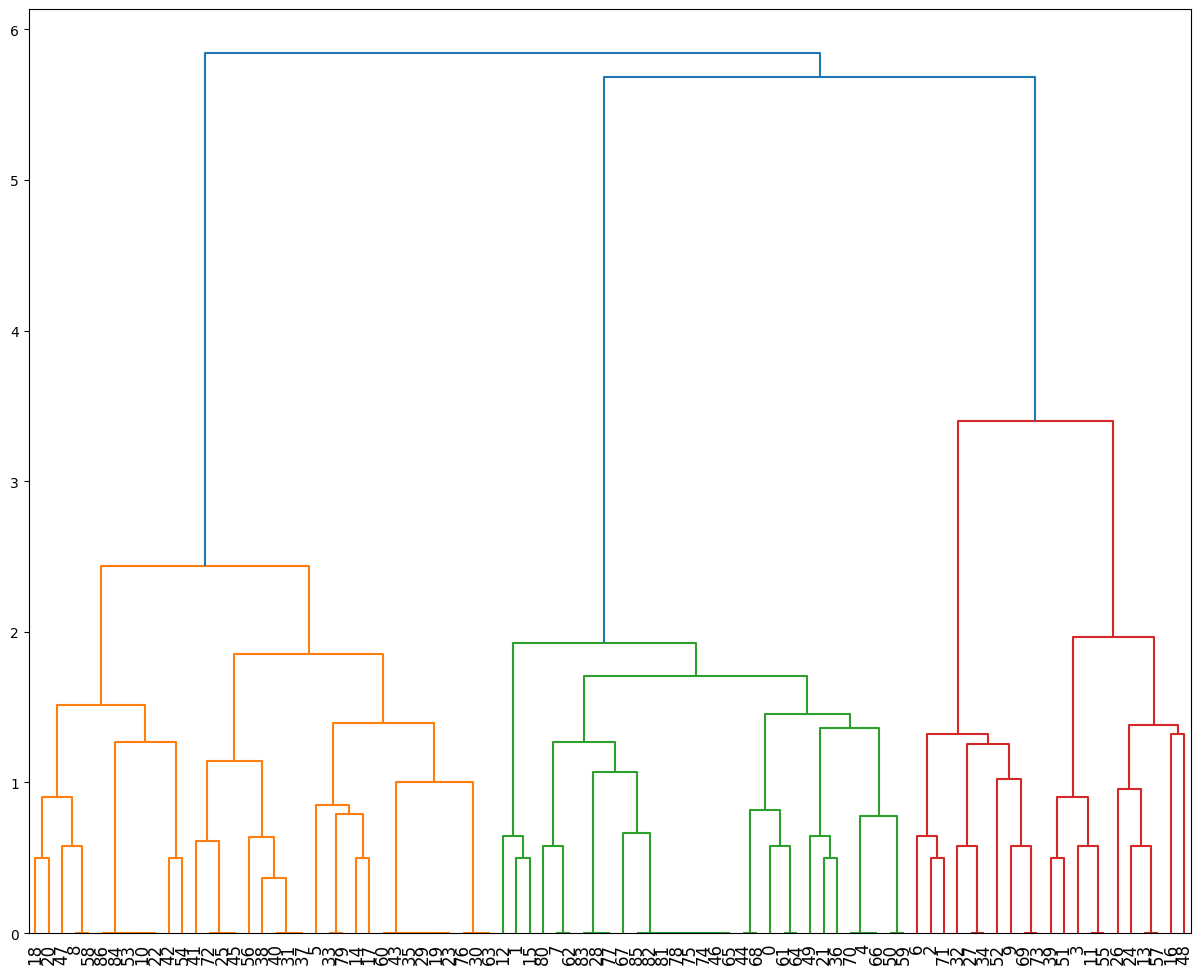

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
#расчет матрицы связей
distance_matrix = linkage(scaled_data, method = 'ward', metric = 'euclidean')

#построение дендрограммы
fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix, leaf_font_size=12)
plt.show()

#Разные цвета - разные автоматически определённые кластеры

#### Иерархическая кластеризация с использованием метода одиночной связи для вычисления расстояний между кластерами.

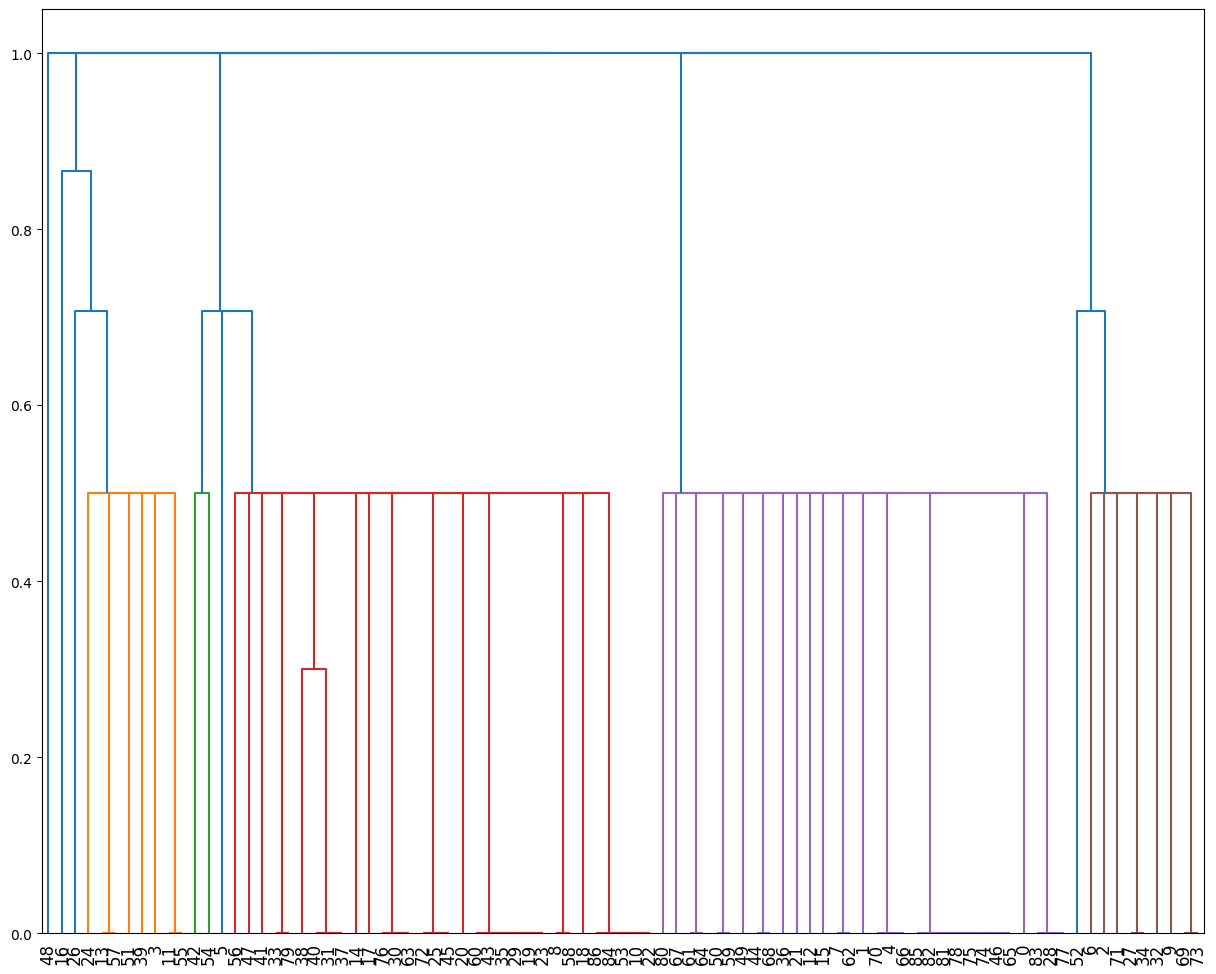

In [ ]:
#расчет матрицы связей
distance_matrix = linkage(scaled_data, method = 'single', metric = 'euclidean')

#построение дендрограммы
fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix, leaf_font_size=12)
plt.show()

#### Иерархическая кластеризация с использованием метода полной связи для вычисления расстояний между кластерами.

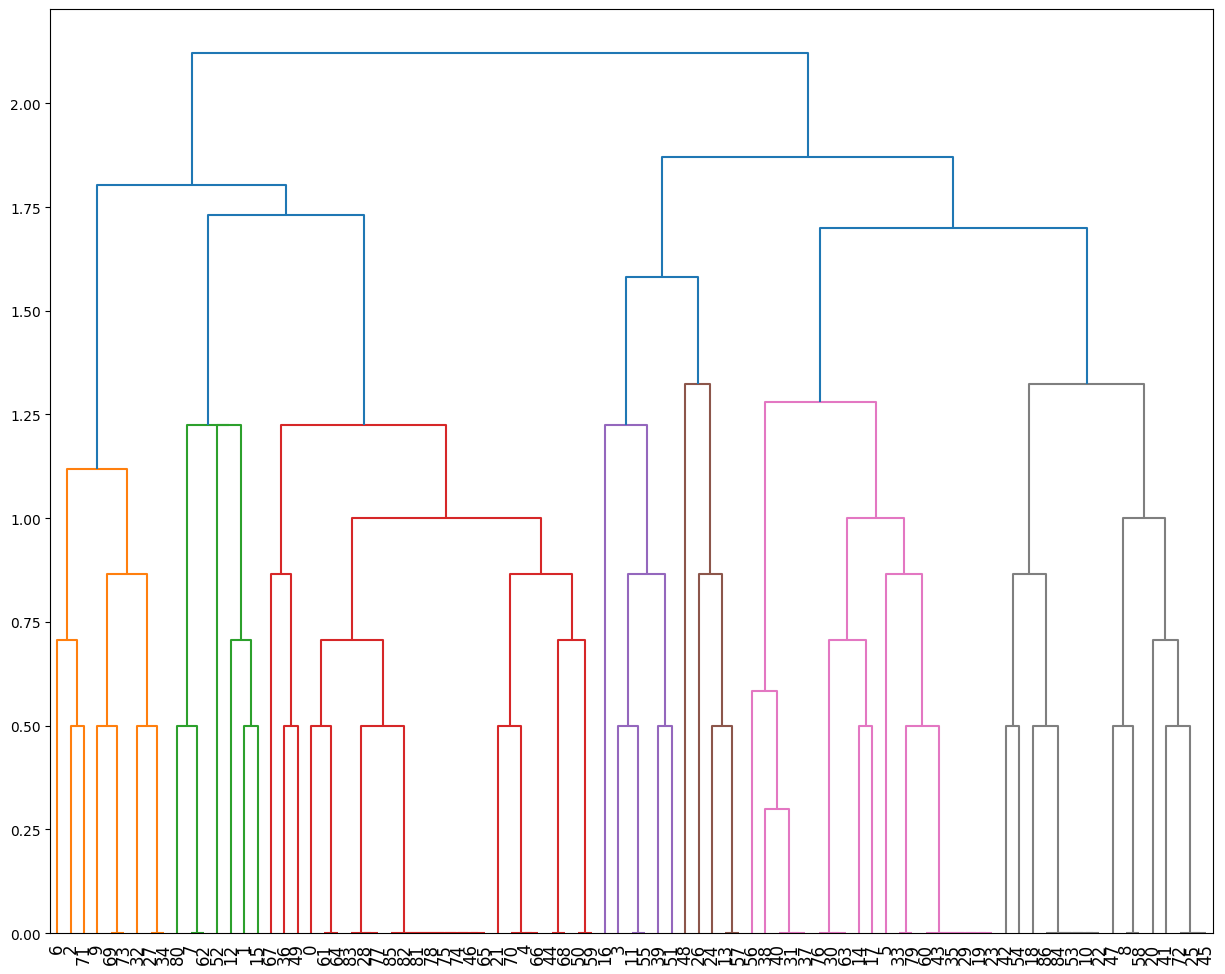

In [ ]:
#расчет матрицы связей
distance_matrix = linkage(scaled_data, method = 'complete', metric = 'euclidean')

#построение дендрограммы
fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix, leaf_font_size=12)
plt.show()

#### Иерархическая кластеризация с использованием метода средней связи для вычисления расстояний между кластерами.

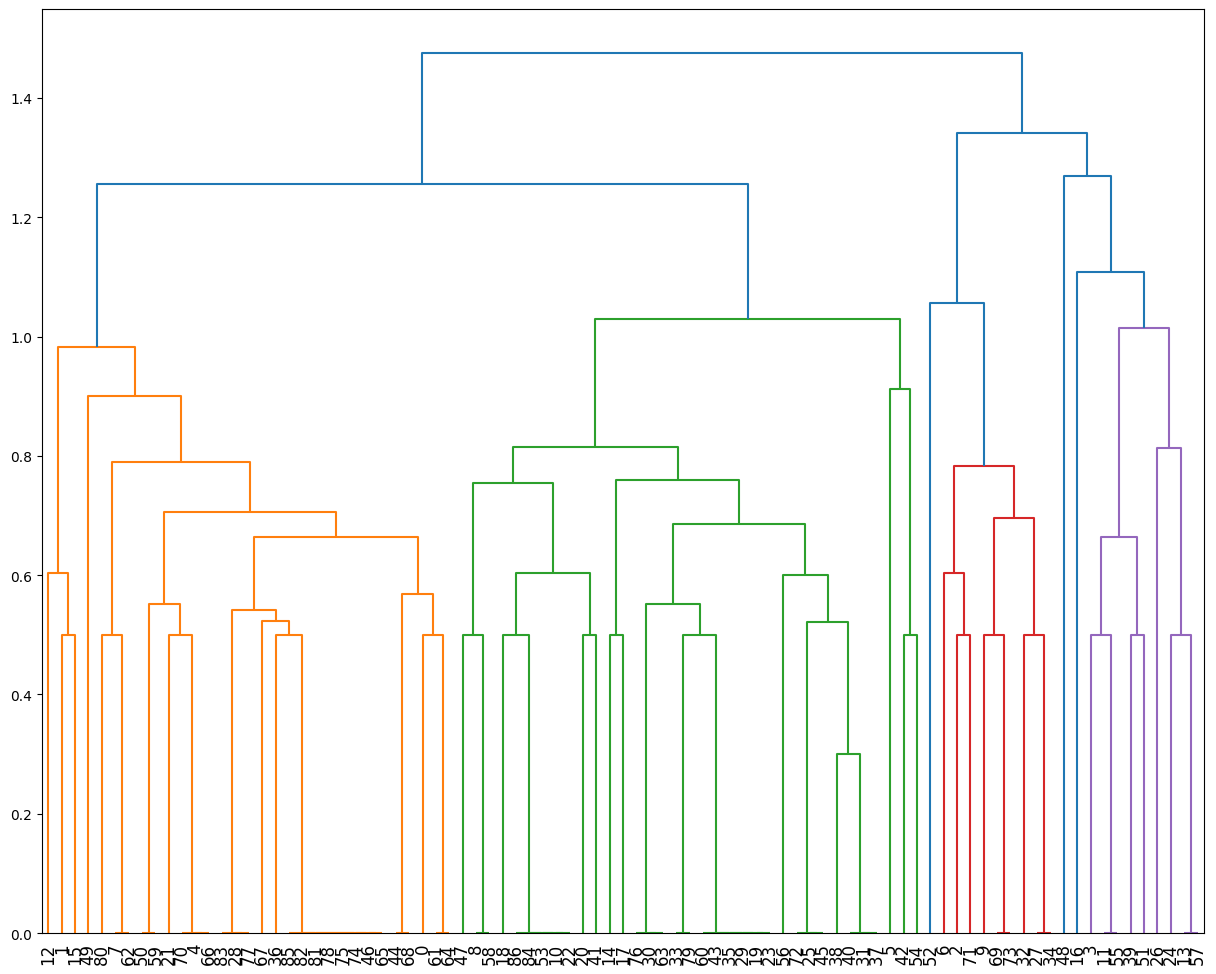

In [ ]:
#расчет матрицы связей
distance_matrix = linkage(scaled_data, method = 'average', metric = 'euclidean')

#построение дендрограммы
fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix, leaf_font_size=12)
plt.show()

#### Иерархическая кластеризация с использованием метода Уорда для вычисления расстояний между кластерами.

Meтки кластеров, найденные алгоритмом 35 : 31 : 21
Реальные метки кластеров 1 : 24 : 62


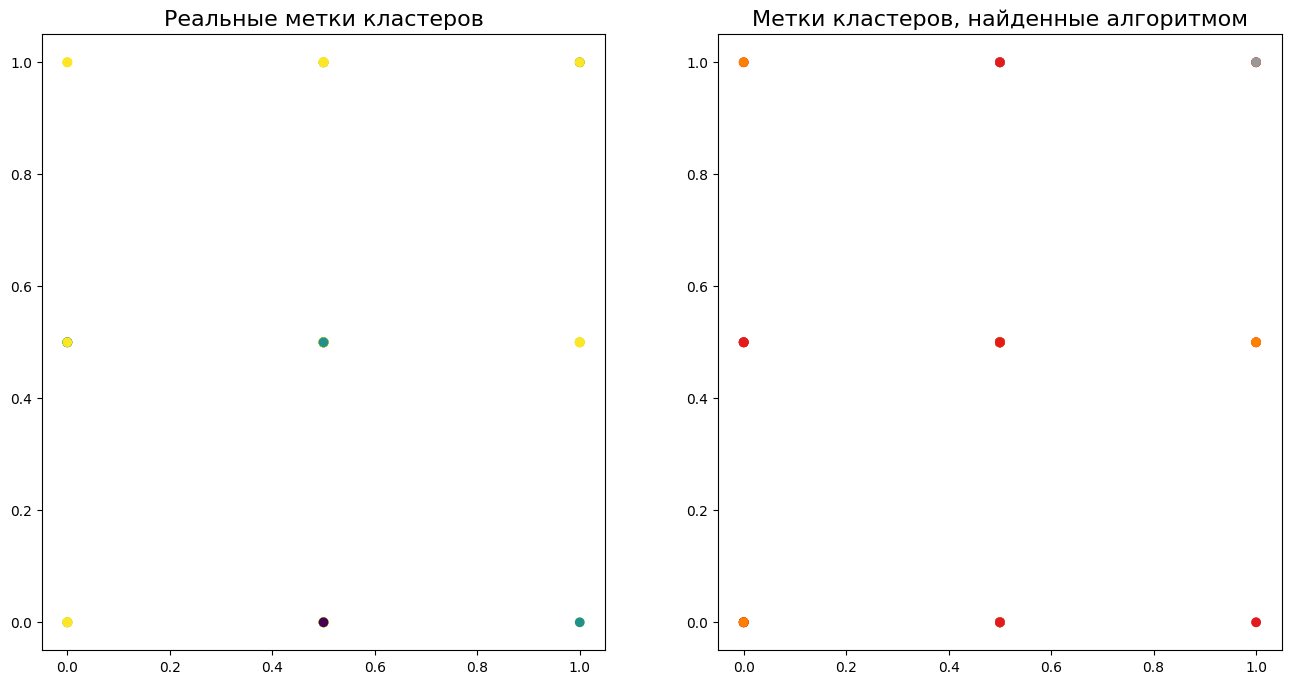

In [ ]:
from scipy.cluster.hierarchy import fcluster
distance_matrix = linkage(scaled_data, method = 'ward', metric = 'euclidean')
df['cluster labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df['target']=list(df_labels)
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],c=df['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],c=df['cluster labels'],
cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Meтки кластеров, найденные алгоритмом',fontsize=16)

list_df1 = list(df['cluster labels'])
list_df2 = list(df['target'])
print('Meтки кластеров, найденные алгоритмом',list_df1.count(1),":",list_df1.count(2),":",list_df1.count(3))
print("Реальные метки кластеров",list_df2.count(1),":",list_df2.count(2),":",list_df2.count(3))

#### Иерархическая кластеризация с использованием метода одиночной связи для вычисления расстояний между кластерами.

Meтки кластеров, найденные алгоритмом 87 : 0 : 0
Реальные метки кластеров 1 : 24 : 62


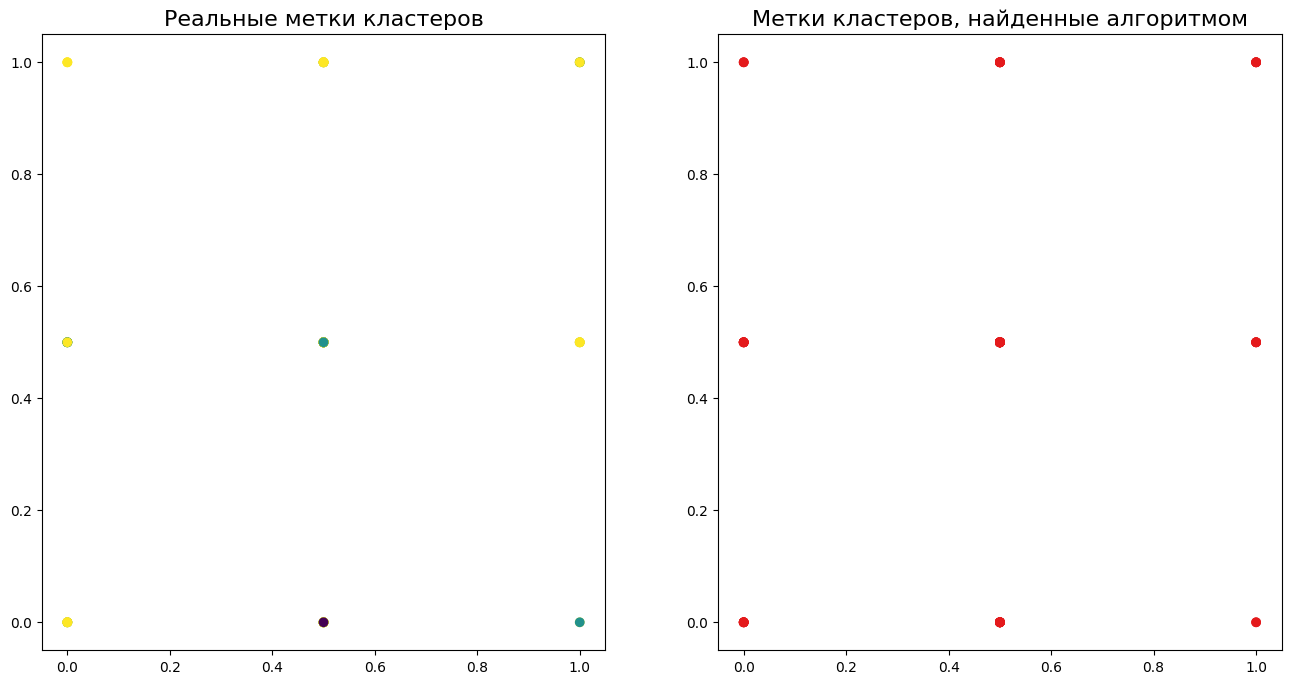

In [ ]:
distance_matrix = linkage(scaled_data, method = 'single', metric = 'euclidean')
df['cluster labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df['target']=list(df_labels)
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],c=df['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],c=df['cluster labels'],
cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Meтки кластеров, найденные алгоритмом',fontsize=16)

list_df1 = list(df['cluster labels'])
list_df2 = list(df['target'])
print('Meтки кластеров, найденные алгоритмом',list_df1.count(1),":",list_df1.count(2),":",list_df1.count(3))
print("Реальные метки кластеров",list_df2.count(1),":",list_df2.count(2),":",list_df2.count(3))

#### Иерархическая кластеризация с использованием метода полной связи для вычисления расстояний между кластерами.

Meтки кластеров, найденные алгоритмом 41 : 11 : 35
Реальные метки кластеров 1 : 24 : 62


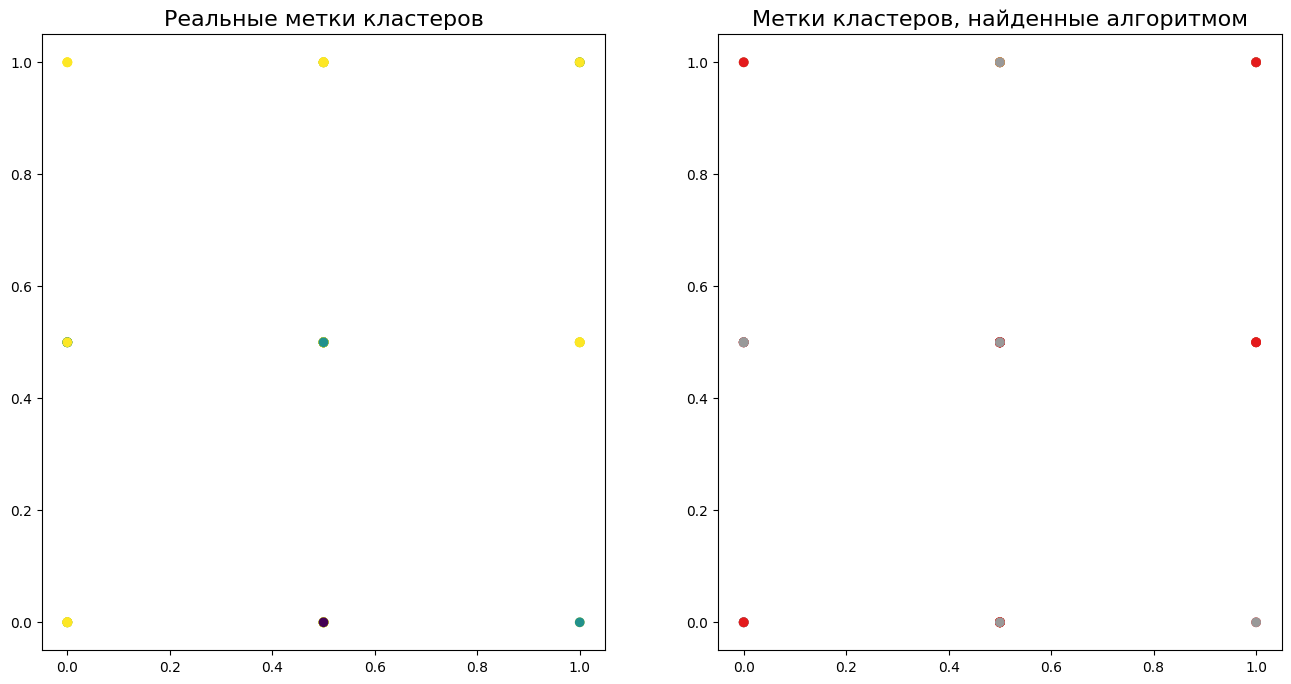

In [ ]:
distance_matrix = linkage(scaled_data, method = 'complete', metric = 'euclidean')
df['cluster labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df['target']=list(df_labels)
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],c=df['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],c=df['cluster labels'],
cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Meтки кластеров, найденные алгоритмом',fontsize=16)

list_df1 = list(df['cluster labels'])
list_df2 = list(df['target'])
print('Meтки кластеров, найденные алгоритмом',list_df1.count(1),":",list_df1.count(2),":",list_df1.count(3))
print("Реальные метки кластеров",list_df2.count(1),":",list_df2.count(2),":",list_df2.count(3))

#### Иерархическая кластеризация с использованием метода средней связи для вычисления расстояний между кластерами.

Meтки кластеров, найденные алгоритмом 66 : 10 : 11
Реальные метки кластеров 1 : 24 : 62


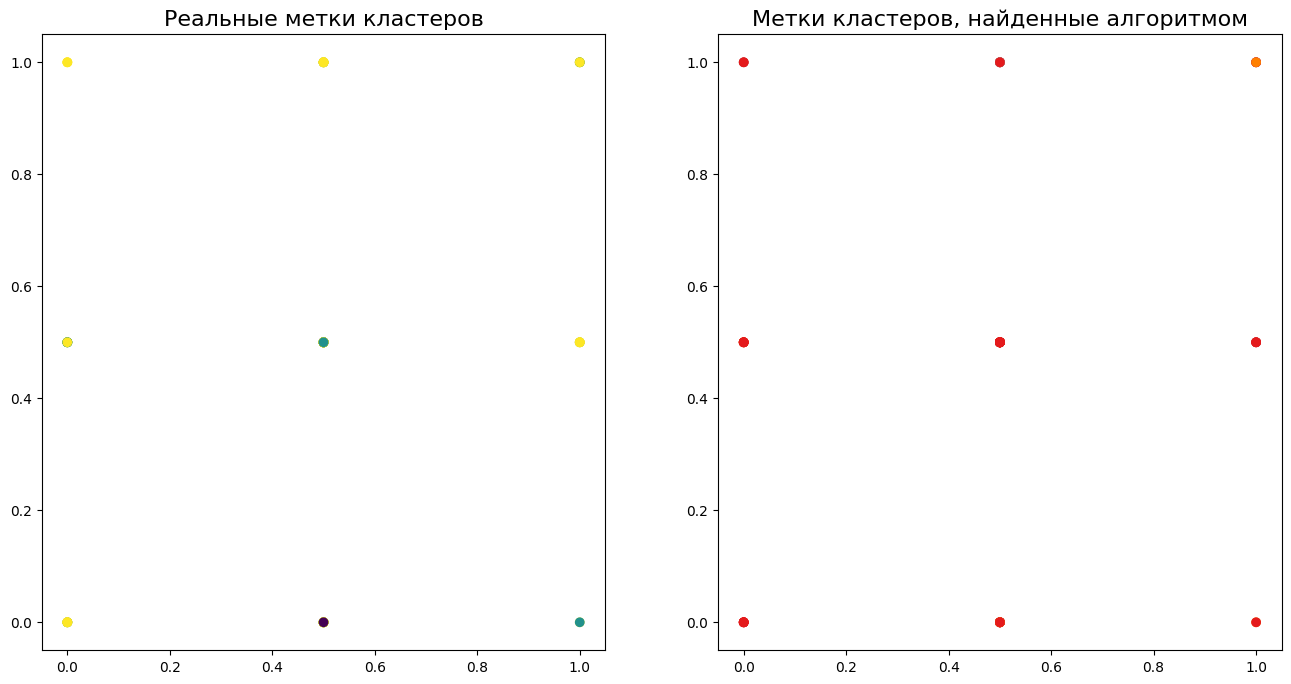

In [ ]:
distance_matrix = linkage(scaled_data, method = 'average', metric = 'euclidean')
df['cluster labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
df['target']=list(df_labels)
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],c=df['target'])
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],c=df['cluster labels'],
cmap=plt.cm.Set1)
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Meтки кластеров, найденные алгоритмом',fontsize=16)

list_df1 = list(df['cluster labels'])
list_df2 = list(df['target'])
print('Meтки кластеров, найденные алгоритмом',list_df1.count(1),":",list_df1.count(2),":",list_df1.count(3))
print("Реальные метки кластеров",list_df2.count(1),":",list_df2.count(2),":",list_df2.count(3))

В рассматриваемой задаче были получены следующие соотношения для
числа объектов в составе кластеров (при разбиении на 3 кластера) для
разных методов группирования объектов в кластеры.

Реальные метки кластеров: 2 : 24 : 64;
'ward': 46 : 24 : 20;
'single': 88 : 1 : 1;
'complete': 57 : 6 : 27;
'average': 2 : 44 : 44.

Наилучшие результаты показали алгоритмы кластеризации с использованием
метода 'average'. Наихудший результат показал алгоритм кластеризации с
использованием метода 'single'.

# Итерационная кластеризация

## Кластеризация методом k-средних

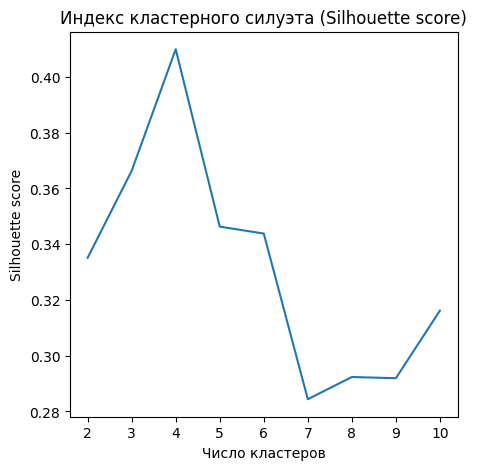

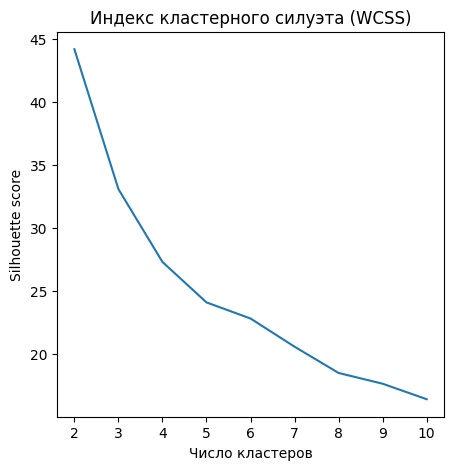

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
WCSS = []
Silh= []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init= 10, random_state = 0)
    kmeans.fit(scaled_data)
    df['cluster labels'] = kmeans.fit_predict(scaled_data)
    WCSS.append(kmeans.inertia_)
    Silh.append(silhouette_score(scaled_data, df['cluster labels'],metric='euclidean'))
# Построение графической зависимости для silhouette score
fig = plt.figure(figsize=(5,5))
plt.plot(range(2, 11), Silh)
plt.title('Индекс кластерного силуэта (Silhouette score)')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')

plt.show()
fig = plt.figure(figsize=(5,5))
plt.plot(range(2, 11), WCSS)
plt.title('Индекс кластерного силуэта (WCSS)')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
Silh

[0.3351297815107318,
 0.36634814227123796,
 0.40998050023958976,
 0.3463203327641891,
 0.34381773117940856,
 0.2843717759549867,
 0.2923469384994915,
 0.29190838938910185,
 0.3161752801580223]

In [ ]:
WCSS

[44.17841993637327,
 33.09397235023042,
 27.320595726853796,
 24.117485337243405,
 22.84162400654512,
 20.607548701298704,
 18.526585213032583,
 17.67461038961039,
 16.446594516594523]

При использовании индекса кластерного силуэта Silh, который должен быть
максимизирован, в качестве оптимального числа кластеров следует выбрать
число, равное 4

In [ ]:
model = KMeans(n_clusters=4, n_init=10)
model.fit(df)
prediction = model.predict(df)
prediction[:10]

array([2, 1, 0, 2, 1, 2, 0, 0, 0, 0], dtype=int32)

In [ ]:
df['cluster labels'] = prediction

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом')

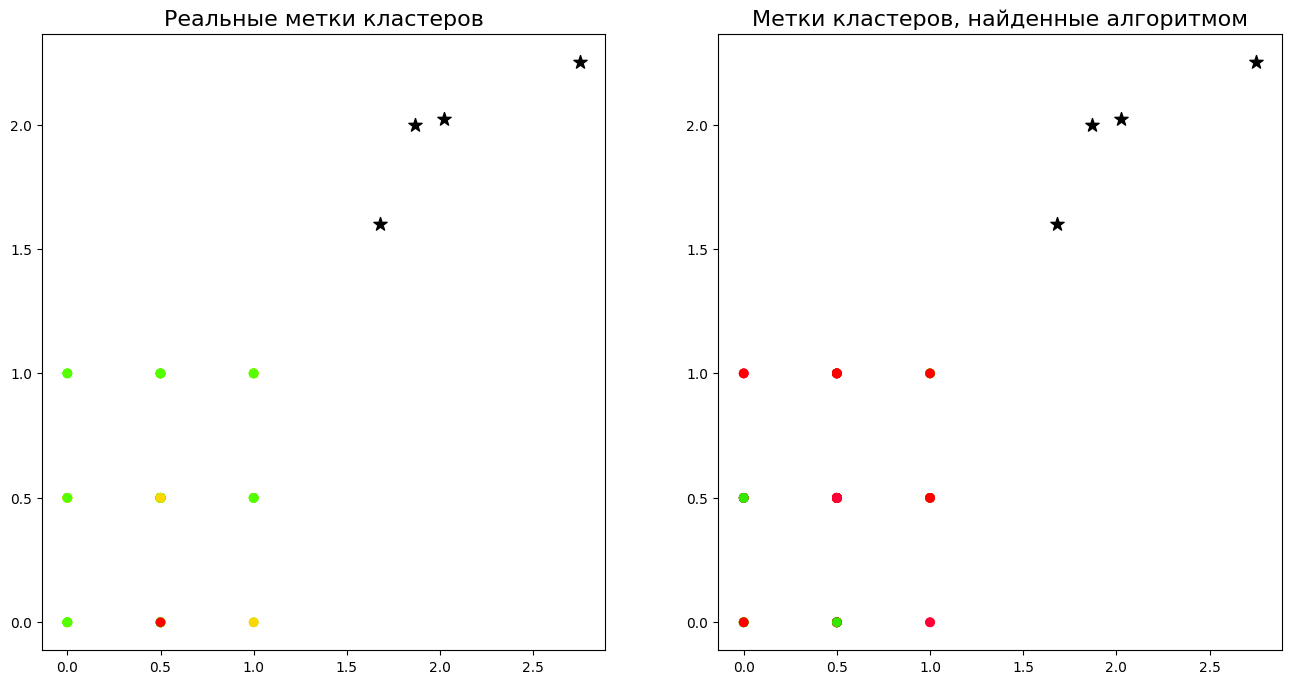

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(scaled_data[:,0], scaled_data[:,1],
                c = df['target'], cmap=plt.cm.prism)
# Вывод центроидов кластеров
axes[0].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
                s = 100, c = 'black', label = 'Centroids', marker='*')
axes[1].scatter(scaled_data[:,0], scaled_data[:,1],
                c=df['cluster labels'], cmap=plt.cm.prism)
# Вывод центроидов кластеров
axes[1].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1],
                s = 100, c = 'black', label = 'Centroids',  marker='*')
axes[0].set_title('Реальные метки кластеров', fontsize=16)
axes[1].set_title('Метки кластеров, найденные алгоритмом', fontsize=16)

## Кластеризация с применением Fuzzy-C-Means алгоритма

In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [ ]:
from fcmeans import FCM
new_data = df.copy()
# Поиск оптимального числа кластеров
silh = []
for i in range(2, 17):
    fcm = FCM(n_clusters=i, m=2, max_iter = 300, random_state=0)
    fcm.fit(scaled_data)
    new_data['cluster_labels'] = fcm.predict(scaled_data)
    silh.append(silhouette_score(scaled_data, new_data['cluster_labels'],
                                 metric='euclidean'))

In [ ]:
silh

[0.1802208007236983,
 0.18816152045397969,
 0.295905429436414,
 0.26561270143803534,
 0.22425117185610335,
 0.22958042226302647,
 0.22460570872918603,
 0.24136305879608907,
 0.2081612212054606,
 0.19943193056043734,
 0.23895098680296714,
 0.15146893828040223,
 0.21688387152407929,
 0.2102615406771141,
 0.19797049216066162]

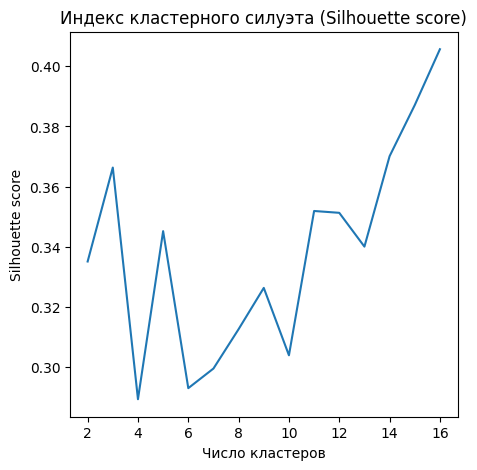

In [ ]:
# Построение графической зависимости для silhouette score
fig = plt.figure(figsize=(5,5))
plt.plot(range(2, 17), silh)
plt.title("Индекс кластерного силуэта (Silhouette score)")
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
model = FCM(n_clusters = 10)
model.fit(new_data.values)
center = model.centers

In [ ]:
prediction = model.predict(new_data.values)
prediction[:10]

array([1, 2, 3, 8, 2, 8, 3, 6, 0, 3])

In [ ]:
new_data["cluster"] = prediction
data0=new_data[new_data.cluster==0]
data1=new_data[new_data.cluster==1]
data2=new_data[new_data.cluster==2]
data3=new_data[new_data.cluster==3]
data4=new_data[new_data.cluster==4]
data5=new_data[new_data.cluster==5]
data6=new_data[new_data.cluster==6]
data7=new_data[new_data.cluster==7]
data8=new_data[new_data.cluster==8]
data9=new_data[new_data.cluster==9]

In [ ]:
data0.columns

Index(['L-CORE', 'L-SURF', 'L-OS', 'L-BP', 'S-SURF', 'S-CORE', 'S-BP',
       'COMFORT', 'cluster labels', 'target', 'cluster_labels', 'cluster'],
      dtype='object')

Text(0.5, 1.0, 'Fuzzy c-means for 10 clusters')

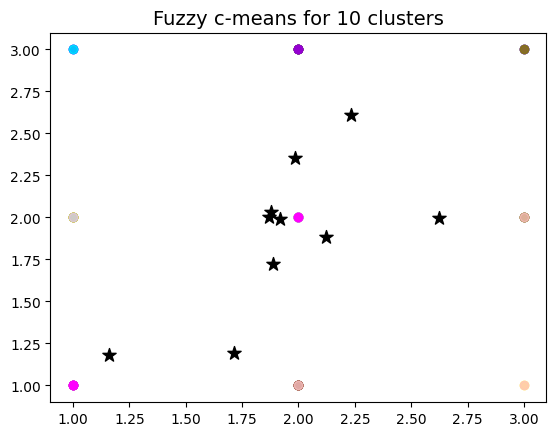

In [ ]:
plt.scatter(data0.iloc[:,0],data0.iloc[:,1],color='green', alpha=0.75)
plt.scatter(data1.iloc[:,0],data1.iloc[:,1],color='blue', alpha=0.75)
plt.scatter(data2.iloc[:,0],data2.iloc[:,1],color='red', alpha=0.75)
plt.scatter(data3.iloc[:,0],data3.iloc[:,1],color='yellow', alpha=0.75)
plt.scatter(data4.iloc[:,0],data4.iloc[:,1],color='orange', alpha=0.75)
plt.scatter(data5.iloc[:,0],data5.iloc[:,1],color='darkviolet', alpha=0.75)
plt.scatter(data6.iloc[:,0],data6.iloc[:,1],color='olive', alpha=0.75)
plt.scatter(data7.iloc[:,0],data7.iloc[:,1],color='aqua', alpha=0.75)
plt.scatter(data8.iloc[:,0],data8.iloc[:,1],color='pink', alpha=0.75)
plt.scatter(data9.iloc[:,0],data9.iloc[:,1],color='magenta', alpha=0.75)
plt.scatter(center[:,0],center[:,1], s = 100, color='black',marker='*')
plt.title("Fuzzy c-means for 10 clusters", fontsize = 14)

## Кластеризация с применением DBSCAN алгоритма

In [ ]:
from math import sqrt
def calculate_kn_distance(X,k):
    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(math.sqrt((((X[i,0] - X[j,0]) ** 2) + ((X[i,1] - X[j,1]) ** 2))))
                             
        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])
                             
    return kn_distance

Text(0.5, 0, 'Eps pасстояние')

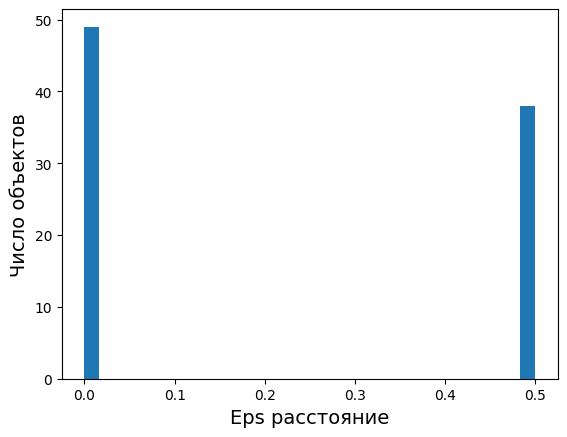

In [ ]:
eps_dist = calculate_kn_distance(scaled_data, 10)
plt.hist(eps_dist, bins=30)
plt.ylabel('Число объектов', size=14)
plt.xlabel('Eps pасстояние', size=14)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, homogeneity_score, completeness_score, v_measure_score
db = DBSCAN(eps=0.9, min_samples=10).fit(scaled_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# число кластеров в метках без учета шума, если он имеется
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Число кластеров: {n_clusters_}")
print(f"Число шумовых объектов: {n_noise_}")
print(f"Homogeneity: {homogeneity_score(df['target'], labels)}")
print(f"Completeness: {completeness_score(df['target'], labels)}")
print(f"V-measure: {v_measure_score(df['target'], labels)}")
print(f"Adjusted Rand Index: {adjusted_rand_score(df['target'], labels)}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(df['target'], labels)}")
print(f"Silhouette score: {silhouette_score(scaled_data, labels)}")

Число кластеров: 3
Число шумовых объектов: 11
Homogeneity: 0.04614658835564878
Completeness: 0.024036007630941655
V-measure: 0.03160839904155796
Adjusted Rand Index: -0.025150201506510362
Adjusted Mutual Information: -0.003415524122394168
Silhouette score: 0.40998050023958976


In [ ]:
new_data = df.copy()
model = DBSCAN(eps=0.9, min_samples=10)
model.fit_predict(new_data)[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
final_tar = df['target'].copy()

In [ ]:
DBSCAN_method = pd.DataFrame(model.labels_)
final_tar["DBSCAN"] = DBSCAN_method
final_tar.head(5)

0    3
1    2
2    3
3    3
4    3
Name: target, dtype: object

In [ ]:
from sklearn.decomposition import PCA
db = model.fit(df)
labels = db.labels_
comp = PCA(n_components = 2).fit_transform(df)
dff = pd.DataFrame(comp, columns = ["0", "1"])
final_tar.head(5)

0    3
1    2
2    3
3    3
4    3
Name: target, dtype: object

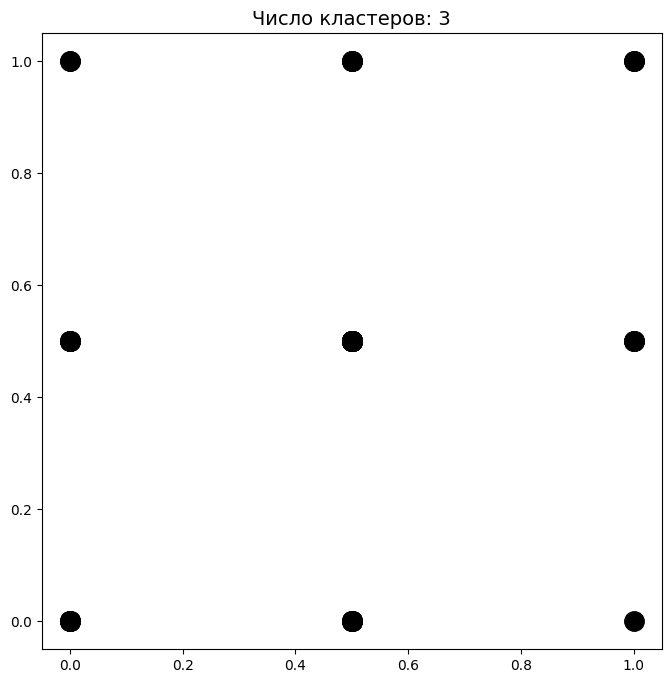

In [ ]:
plt.figure (figsize=(8,8))
# задание цвета для маркеров, обозначающих объекты разных кластеров
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1,
len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # черный цвет используется для шумовых объектов
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = scaled_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0],xy[:,1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14)
    xy = scaled_data[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0],xy[:,1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=6)
plt.title("Число кластеров: %d" % n_clusters_, size=14)
plt. show()

## UMAP

In [1]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=810da814f85e0e8035c7af4c23d051aea6c4ec35d4f346130ea1a203a98134c8
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=438b2aca98f2b27668b6d25980c903c8ec267a4d5281ca23d6cb1d231cf274fc
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


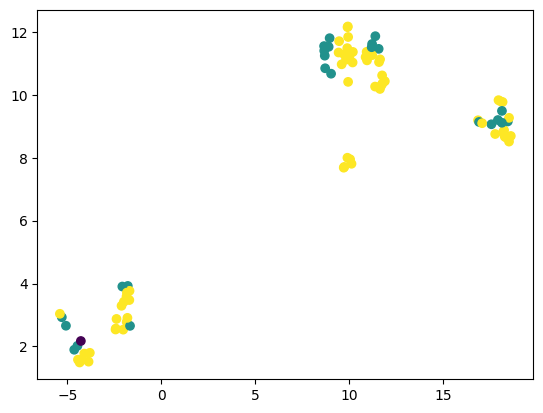

In [ ]:
from umap.umap_ import UMAP
new_data = df.copy()
embedding = UMAP(n_neighbors=5).fit_transform(new_data)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], 
    c = df['target'].values)
plt.show()

## t-sne

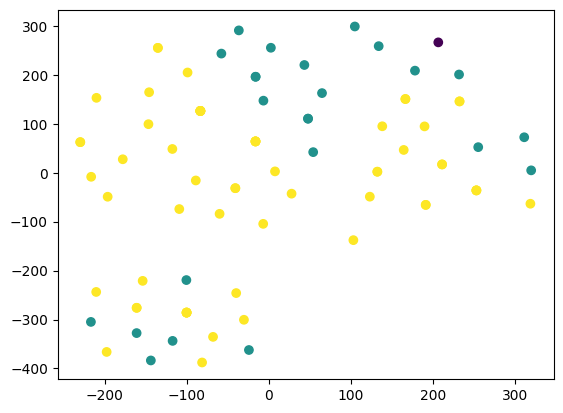

In [ ]:
from sklearn.manifold import TSNE
new_data = df.copy()
tsne = TSNE()
embedding_tsne = tsne.fit_transform(new_data)

plt.scatter(
    embedding_tsne[:, 0],
    embedding_tsne[:, 1], 
    c = df['target'].values)
plt.show()